In [ ]:
from sklearn.linear_model import LinearRegression
l=LinearRegression()
t=[[5],[7],[12],[16],[20]]
m=[40,120,180,210,240]
l.fit(t,m)
l.predict([[5.5]])

array([78.64935065])

[ 77.22109533  98.47870183 151.62271805 204.76673428 257.91075051]


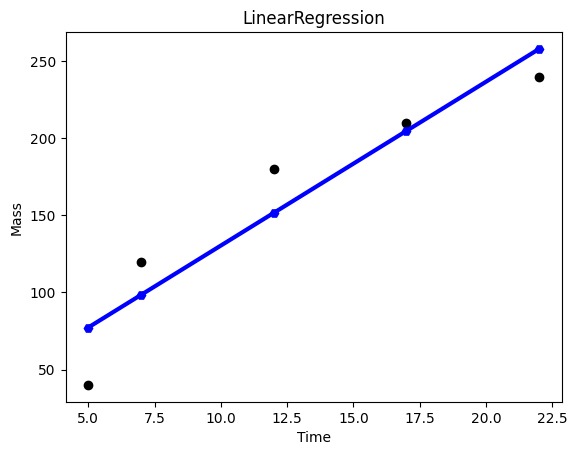

In [ ]:
plt.scatter(t,m,color='black')
#plot linear regression line
y_pred=l.predict(t)
print(y_pred)
plt.plot(t,y_pred,color='blue',linewidth=3,marker="H")
plt.xlabel('Time')
plt.ylabel('Mass')
plt.title('LinearRegression')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd #for importing dataset
import numpy as nm #for doing mathematical operations
from sklearn.model_selection import train_test_split as ttp #to break dataset for training and testing
from sklearn.metrics import classification_report # to generate classification report
import re #for data cleaning purpose
import string #to deal with text data
import matplotlib.pyplot as plt #for visualizing dataset

In [ ]:
data_true=pd.read_csv("/content/drive/MyDrive/dataset/bully1.csv",encoding='latin1')
data_fake=pd.read_csv("/content/drive/MyDrive/dataset/not_bully.csv",encoding='latin1')

In [ ]:
data_true.columns

Index(['tweet_text'], dtype='object')

In [ ]:
data_fake.columns

Index(['tweet_text'], dtype='object')

In [ ]:
data_true.head(5)

,tweet_text
0,I need to just switch to an organization-based...
1,RMAed my monoprice. Shoddy power bricks on tho...
2,@murphy_slaw https://t.co/M8w8xnUnDL
3,@1Life0Continues i've got the code to interpre...
4,@krainboltgreene didn't mention your name. i c...


In [ ]:
data_fake.head(5)

,tweet_text
0,"In other words #katandandre, your food was cra..."
1,Why is #aussietv so white? #MKR #theblock #ImA...
2,@XochitlSuckkks a classy whore? Or more red ve...
3,"@Jason_Gio meh. :P thanks for the heads up, b..."
4,@RudhoeEnglish This is an ISIS account pretend...


In [ ]:
data_true.shape, data_fake.shape

((100, 1), (99, 1))

In [ ]:
data_true["class"]=1
data_fake["class"]=0

In [ ]:
data_true_manual_testing = data_true.tail(10)
for i in range(89,79,-1):
    data_true.drop([i],axis=0, inplace=True)#removing those 10 values from original dataset

data_fake_manual_testing = data_fake.tail(10)
for i in range(88,78,-1):
    data_fake.drop([i],axis=0, inplace=True)#removing those 10 values from original dataset

In [ ]:
data_manual_testing = pd.concat([data_fake_manual_testing, data_true_manual_testing], axis=0)
data_manual_testing.to_csv("manual_testing.csv ")

In [ ]:
data_merge = pd.concat([data_fake,data_true],axis=0)
data_merge.head(10)#displaying first 10 values after above operation

,tweet_text,class
0,"In other words #katandandre, your food was cra...",0
1,Why is #aussietv so white? #MKR #theblock #ImA...,0
2,@XochitlSuckkks a classy whore? Or more red ve...,0
3,"@Jason_Gio meh. :P thanks for the heads up, b...",0
4,@RudhoeEnglish This is an ISIS account pretend...,0
5,"@Raja5aab @Quickieleaks Yes, the test of god i...",0
6,Itu sekolah ya bukan tempat bully! Ga jauh kay...,0
7,Karma. I hope it bites Kat on the butt. She is...,0
8,@stockputout everything but mostly my priest,0
9,Rebecca Black Drops Out of School Due to Bully...,0


In [ ]:
data_merge.columns

Index(['tweet_text', 'class'], dtype='object')

class
0    89
1    90
Name: tweet_text, dtype: int64


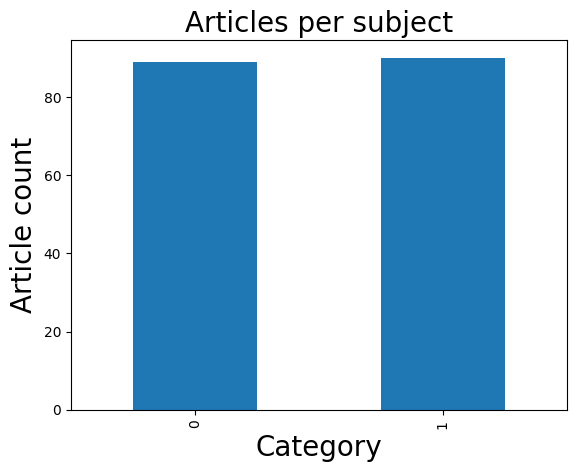

In [ ]:
print(data_merge.groupby(['class'])['tweet_text'].count())
data_merge.groupby(['class'])['tweet_text'].count().plot(kind="bar")
plt.title("Articles per subject",size=20)
plt.xlabel("Category",size=20)
plt.ylabel("Article count",size=20)
plt.show()

class
0    89
1    90
Name: tweet_text, dtype: int64
0 = Fake news
1 = True news


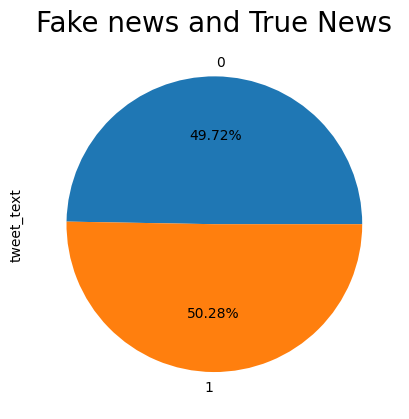

In [ ]:
print(data_merge.groupby(['class'])['tweet_text'].count())
print("0 = Fake news\n1 = True news")
data_merge.groupby(['class'])['tweet_text'].count().plot(kind="pie", autopct="%0.2f%%")
plt.title("Fake news and True News",size=20)
plt.show()

In [ ]:
data=data_merge.sample(frac=1)
data.head(10)

,tweet_text,class
68,@nat_com1 @Feminazi_Front Men don't get to hav...,1
15,@yasmimcaci @Bferrarii PAREM DE FAZER BULLYING...,0
0,"In other words #katandandre, your food was cra...",0
39,Fuck. #MKR,0
18,@promit_roy i'm not sure. I've never been down...,1
10,@Jord_Is_Dead http://t.co/UsQInYW5Gn,0
30,@Firebomb173 @ANDAASONSAN not the first time i...,0
55,Someone sent pizza to the wrong address. Again...,1
45,#NowWatching a Charlie Brown Thanksgiving #cla...,0
48,@BasedMonitored I feel bad for the cars. Not t...,1


In [ ]:
data.isnull().sum()

tweet_text    0
class         0
dtype: int64